<a href="https://colab.research.google.com/github/kanchan14kumari/sentiment-and-emotion-analysis-of-codemixed-data/blob/main/BiLstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code to train & evaluate BiLSTM .

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding ,Bidirectional
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import accuracy_score

In [ ]:
# Load datasets from CSV files
train_df = pd.read_csv("preprocessed_train.csv")
test_df = pd.read_csv("preprocessed_test.csv")
val_df = pd.read_csv("preprocessed_val.csv")

In [ ]:
# Fill missing values in each dataset
train_df.fillna("", inplace=True)
val_df.fillna("", inplace=True)
test_df.fillna("", inplace=True)

In [ ]:
d = pd.read_csv('/content/preprocessed_train.csv')
x=d['tweet']
y=d['sentiment']
y=list(y)
x=list(x)
for i in range(len(y)):
    if y[i]=='negative':
        y[i] = 0
    elif y[i]=='neutral':
        y[i] = 1
    elif y[i]=='positive':
        y[i] = 2
y=np.array(y)


v = pd.read_csv('/content/preprocessed_val.csv')
vx=v['tweet']
vy=v['sentiment']
vy=list(vy)
vx=list(vx)
for i in range(len(vy)):
  for i in range(len(vy)):
    if vy[i]=='negative':
        vy[i] = 0
    elif vy[i]=='neutral':
        vy[i] = 1
    elif vy[i]=='positive':
        vy[i] = 2
vy=np.array(vy)


t = pd.read_csv('/content/preprocessed_test.csv')
tx=list(t['tweet'])

ty = pd.read_csv('/content/test_labels.csv')
sentiment = []
ty = ty['Label']
for i in range(len(ty)):
    if ty[i]=='negative':
        sentiment.append(0)
    elif ty[i]=='neutral':
        sentiment.append(1)
    elif ty[i]=='positive':
        sentiment.append(2)
ty = np.array(sentiment)

In [ ]:
# Import preprocessed validate data
df_v = pd.read_csv('/content/preprocessed_val.csv')
vx=df_v['tweet']
vy=df_v['sentiment']
vy=list(vy)
vx=list(vx)
for i in range(len(vy)):
  for i in range(len(vy)):
    if vy[i]=='negative':
        vy[i] = 0
    elif vy[i]=='neutral':
        vy[i] = 1
    elif vy[i]=='positive':
        vy[i] = 2
vy=np.array(vy)

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have preprocessed_test.csv and test_labels.csv files
# Import preprocessed test data
t = pd.read_csv('/content/preprocessed_test.csv')
tx = list(t['tweet'])  # Assuming tweets are in the 'tweet' column

# Read sentiment labels (adjust column name if needed)
ty = pd.read_csv('/content/test_labels.csv')
sentiment_labels = ty['Label']  # Replace 'column_name' with the actual column name

sentiment = []

for i in range(len(sentiment_labels)):
    # Check sentiment label and assign corresponding value
    if sentiment_labels.iloc[i] == 'negative':
        sentiment.append(0)
    elif sentiment_labels.iloc[i] == 'neutral':
        sentiment.append(1)
    elif sentiment_labels.iloc[i] == 'positive':
        sentiment.append(2)


ty = np.array(sentiment)




In [ ]:
# Handle missing values
# Convert NaN values to empty strings
train_df.fillna("", inplace=True)
val_df.fillna("", inplace=True)
test_df.fillna("", inplace=True)

# Convert all data to strings
train_texts = train_df['tweet'].astype(str).tolist()
val_texts = val_df['tweet'].astype(str).tolist()
test_texts = t['tweet'].astype(str).tolist()  # Assuming 't' is your test DataFrame

# Tokenize the data
tokenizer = Tokenizer(num_words=2500, split=' ')
tokenizer.fit_on_texts(train_texts)

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to ensure uniform length
max_sequence_length = 50  # Choose an appropriate sequence length
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_data = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)


In [ ]:
vocab_size = 20000
embed_size = 128
# Model
inputs = tf.keras.Input(shape=(train_data.shape[1], ))  # Corrected input shape
embd = Embedding(vocab_size, embed_size, trainable=True)(inputs)
x_lstmConv = Bidirectional(LSTM(128, activation='tanh', return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(embd)
x_lstmConv = tf.keras.layers.Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x_lstmConv)
avg_pool = tf.keras.layers.GlobalAveragePooling1D()(x_lstmConv)
max_pool = tf.keras.layers.GlobalMaxPool1D()(x_lstmConv)
x_lstmConv = tf.keras.layers.concatenate([avg_pool, max_pool])
x_lstmConv = Dense(3, activation='softmax')(x_lstmConv)
biLstm = tf.keras.Model(inputs=inputs, outputs=x_lstmConv)  # Corrected model output
biLstm.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07), metrics=['accuracy'])
fittingLSTM = biLstm.fit(train_data, y, epochs=10, batch_size=128, verbose=2, validation_data=(val_data, vy))  # Corrected fit statement


Epoch 1/10
110/110 - 92s - loss: 0.9237 - accuracy: 0.5448 - val_loss: 0.8723 - val_accuracy: 0.5973 - 92s/epoch - 834ms/step
Epoch 2/10
110/110 - 85s - loss: 0.7944 - accuracy: 0.6401 - val_loss: 0.8945 - val_accuracy: 0.5890 - 85s/epoch - 776ms/step
Epoch 3/10
110/110 - 86s - loss: 0.7222 - accuracy: 0.6806 - val_loss: 0.9584 - val_accuracy: 0.5700 - 86s/epoch - 781ms/step
Epoch 4/10
110/110 - 85s - loss: 0.6432 - accuracy: 0.7246 - val_loss: 1.0167 - val_accuracy: 0.5717 - 85s/epoch - 771ms/step
Epoch 5/10
110/110 - 85s - loss: 0.5476 - accuracy: 0.7708 - val_loss: 1.1990 - val_accuracy: 0.5550 - 85s/epoch - 771ms/step
Epoch 6/10
110/110 - 85s - loss: 0.4492 - accuracy: 0.8147 - val_loss: 1.3132 - val_accuracy: 0.5460 - 85s/epoch - 772ms/step
Epoch 7/10
110/110 - 83s - loss: 0.3762 - accuracy: 0.8524 - val_loss: 1.5390 - val_accuracy: 0.5430 - 83s/epoch - 758ms/step
Epoch 8/10
110/110 - 85s - loss: 0.3302 - accuracy: 0.8687 - val_loss: 1.7932 - val_accuracy: 0.5353 - 85s/epoch - 771

In [ ]:
# Evaluate Results
test_loss, test_acc = biLstm.evaluate(test_data, ty)
print("Test accuracy of BiLSTM model = " + str(test_acc))


94/94 [==============================] - 5s 51ms/step - loss: 1.7575 - accuracy: 0.5757
Test accuracy of BiLSTM model = 0.5756666660308838


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
predictions = biLstm.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(ty, predicted_labels)

# Calculate precision
precision = precision_score(ty, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(ty, predicted_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(ty, predicted_labels, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


94/94 [==============================] - 9s 95ms/step
Accuracy: 0.5756666666666667
Precision: 0.5749786593211639
Recall: 0.5756666666666667
F1 Score: 0.5753078033035851


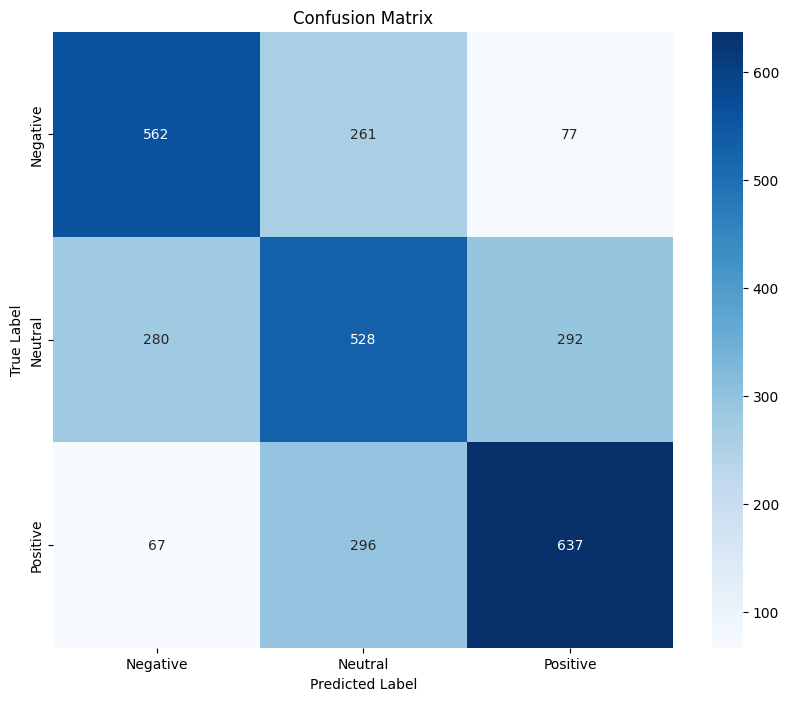

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(ty, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


ROC curve for each class, along with the AUC value

94/94 [==============================] - 5s 53ms/step


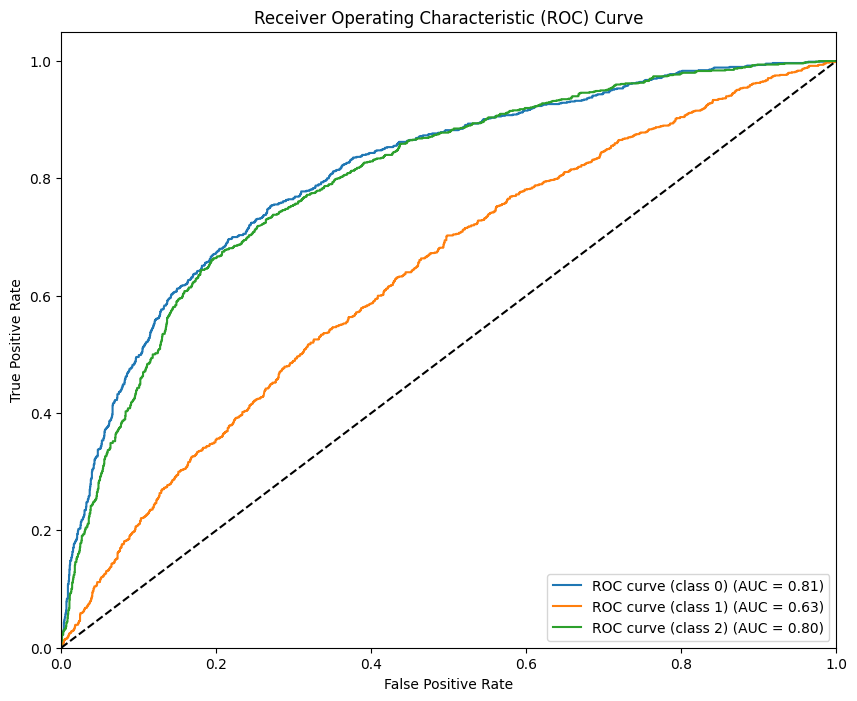

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for each class
predicted_probabilities = biLstm.predict(test_data)

# Compute ROC curve and ROC area for each class
num_classes = len(np.unique(ty))  # Define num_classes here

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):  # Assuming num_classes is the number of classes
    fpr[i], tpr[i], _ = roc_curve(ty == i, predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(num_classes):  # Assuming num_classes is the number of classes
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#emotion
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load datasets from CSV files
train_df_emotion = pd.read_csv("preprocessed_train.csv")
test_df_emotion = pd.read_csv("preprocessed_test.csv")
val_df_emotion = pd.read_csv("preprocessed_val.csv")

# Fill missing values in each dataset
train_df_emotion.fillna("", inplace=True)
val_df_emotion.fillna("", inplace=True)
test_df_emotion.fillna("", inplace=True)

# Define label mapping
label_map = {'anger': 0, 'fear': 1, 'joy': 2, 'disgust': 3, 'sadness': 4, 'surprise': 5, 'others': 6}

# Apply label encoding
train_df_emotion['emotion'] = train_df_emotion['emotion'].map(label_map)
val_df_emotion['emotion'] = val_df_emotion['emotion'].map(label_map)
test_df_emotion['emotion'] = test_df_emotion['emotion'].map(label_map)

# Convert all data to strings
train_texts = train_df_emotion['tweet'].astype(str).tolist()
val_texts = val_df_emotion['tweet'].astype(str).tolist()
test_texts = test_df_emotion['tweet'].astype(str).tolist()

# Tokenize the data
tokenizer = Tokenizer(num_words=2500, split=' ')
tokenizer.fit_on_texts(train_texts)

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to ensure uniform length
max_sequence_length = 50  # Choose an appropriate sequence length
train_data_emotion = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_data_emotion = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_data_emotion = pad_sequences(test_sequences, maxlen=max_sequence_length)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Conv1D, Dense, GlobalAveragePooling1D, GlobalMaxPooling1D

# Define the model architecture
vocab_size = 2500
embed_size = 128

inputs = Input(shape=(max_sequence_length,))
embd = Embedding(vocab_size, embed_size, trainable=True)(inputs)
x_lstmConv = Bidirectional(LSTM(128, activation='tanh', return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(embd)
x_lstmConv = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x_lstmConv)
avg_pool = GlobalAveragePooling1D()(x_lstmConv)
max_pool = GlobalMaxPooling1D()(x_lstmConv)
x_lstmConv = tf.keras.layers.concatenate([avg_pool, max_pool])
x_lstmConv = Dense(7, activation='softmax')(x_lstmConv)  # Output dimension changed to 7 for 7 emotions

# Compile the model
biLstm = Model(inputs=inputs, outputs=x_lstmConv)
biLstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
fittingLSTM = biLstm.fit(train_data_emotion, train_df_emotion['emotion'].values,
                          epochs=7, batch_size=128,
                          validation_data=(val_data_emotion, val_df_emotion['emotion'].values),
                          verbose=2)

# Evaluate the model
test_loss, test_acc = biLstm.evaluate(test_data_emotion, test_df_emotion['emotion'].values)
print("Test accuracy of BiLSTM model for emotion classification:", test_acc)


Epoch 1/7
110/110 - 90s - loss: 1.3012 - accuracy: 0.4886 - val_loss: 1.1132 - val_accuracy: 0.5633 - 90s/epoch - 817ms/step
Epoch 2/7
110/110 - 82s - loss: 1.0312 - accuracy: 0.6136 - val_loss: 1.0949 - val_accuracy: 0.5850 - 82s/epoch - 746ms/step
Epoch 3/7
110/110 - 80s - loss: 0.9530 - accuracy: 0.6431 - val_loss: 1.1653 - val_accuracy: 0.5730 - 80s/epoch - 728ms/step
Epoch 4/7
110/110 - 81s - loss: 0.9008 - accuracy: 0.6653 - val_loss: 1.1831 - val_accuracy: 0.5650 - 81s/epoch - 736ms/step
Epoch 5/7
110/110 - 82s - loss: 0.8452 - accuracy: 0.6829 - val_loss: 1.2272 - val_accuracy: 0.5587 - 82s/epoch - 750ms/step
Epoch 6/7
110/110 - 81s - loss: 0.7779 - accuracy: 0.7129 - val_loss: 1.2875 - val_accuracy: 0.5513 - 81s/epoch - 735ms/step
Epoch 7/7
110/110 - 80s - loss: 0.7176 - accuracy: 0.7336 - val_loss: 1.3889 - val_accuracy: 0.5287 - 80s/epoch - 728ms/step
94/94 [==============================] - 4s 39ms/step - loss: 1.1657 - accuracy: 0.5740
Test accuracy of BiLSTM model for emo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get model predictions
predictions = biLstm.predict(test_data_emotion)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Calculate metrics
accuracy = accuracy_score(test_df_emotion['emotion'].values, predicted_labels)
precision = precision_score(test_df_emotion['emotion'].values, predicted_labels, average='weighted')
recall = recall_score(test_df_emotion['emotion'].values, predicted_labels, average='weighted')
f1 = f1_score(test_df_emotion['emotion'].values, predicted_labels, average='weighted')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


94/94 [==============================] - 9s 87ms/step
Accuracy: 0.574
Precision: 0.581698295310596
Recall: 0.574
F1 Score: 0.5721255402737093


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


94/94 [==============================] - 6s 65ms/step


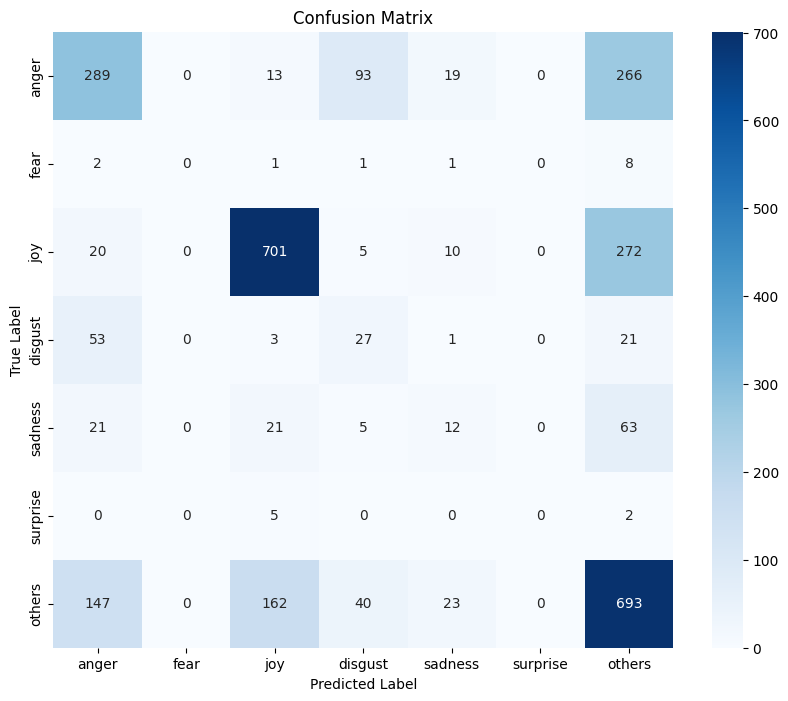

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get model predictions
predictions = biLstm.predict(test_data_emotion)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_df_emotion['emotion'].values, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


94/94 [==============================] - 4s 44ms/step


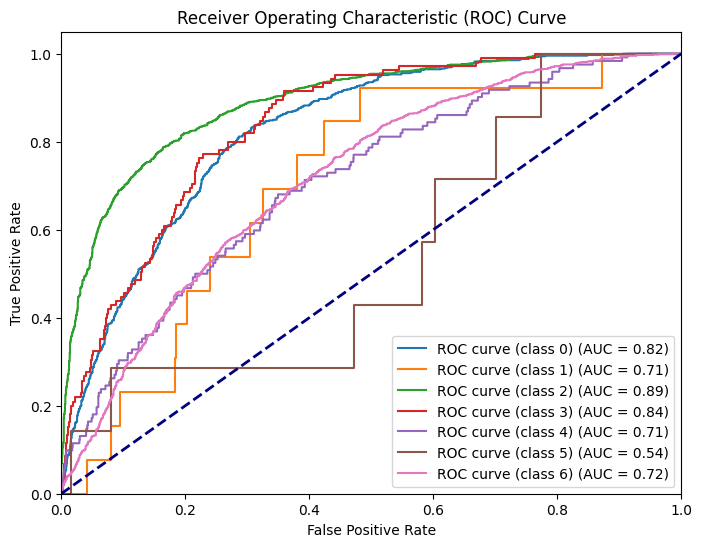

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
predicted_probabilities = biLstm.predict(test_data_emotion)

# Initialize lists to store fpr, tpr, and auc for each class
all_fpr = []
all_tpr = []
all_auc = []

# Compute ROC curve and ROC area for each class
num_classes = predicted_probabilities.shape[1]
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_df_emotion['emotion'].values == i, predicted_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_auc.append(roc_auc)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(all_fpr[i], all_tpr[i], label=f'ROC curve (class {i}) (AUC = {all_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#combine for sentiment and emotion

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Conv1D, Dense, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate

# Load dataset from CSV file
train_df = pd.read_csv("/content/preprocessed_train.csv")  # Update path to your training dataset
test_df = pd.read_csv("/content/preprocessed_test.csv")    # Update path to your testing dataset
val_df = pd.read_csv("/content/preprocessed_val.csv")      # Update path to your validation dataset

# Combine sentiment and emotion labels into a single label
train_df['combined_label'] = train_df['sentiment'] + "_" + train_df['emotion']
test_df['combined_label'] = test_df['sentiment'] + "_" + test_df['emotion']
val_df['combined_label'] = val_df['sentiment'] + "_" + val_df['emotion']

# Convert all data to strings
train_df['tweet'] = train_df['tweet'].astype(str)
test_df['tweet'] = test_df['tweet'].astype(str)
val_df['tweet'] = val_df['tweet'].astype(str)

# Encode the combined label
label_encoder = LabelEncoder()
train_df['combined_label_encoded'] = label_encoder.fit_transform(train_df['combined_label'])
test_df['combined_label_encoded'] = label_encoder.transform(test_df['combined_label'])
val_df['combined_label_encoded'] = label_encoder.transform(val_df['combined_label'])

# Tokenize the data
tokenizer = Tokenizer(num_words=2500, split=' ')
tokenizer.fit_on_texts(train_df['tweet'])

# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['tweet'])
val_sequences = tokenizer.texts_to_sequences(val_df['tweet'])
test_sequences = tokenizer.texts_to_sequences(test_df['tweet'])

# Pad sequences to ensure uniform length
max_sequence_length = 50  # Choose an appropriate sequence length
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
val_data = pad_sequences(val_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

# Define model architecture
vocab_size = 2500
embed_size = 128

inputs = Input(shape=(max_sequence_length,))
embd = Embedding(vocab_size, embed_size, trainable=True)(inputs)
x_lstmConv = Bidirectional(LSTM(128, activation='tanh', return_sequences=True, dropout=0.15, recurrent_dropout=0.15))(embd)
x_lstmConv = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x_lstmConv)
avg_pool = GlobalAveragePooling1D()(x_lstmConv)
max_pool = GlobalMaxPooling1D()(x_lstmConv)
x_lstmConv = concatenate([avg_pool, max_pool])
x_lstmConv = Dense(label_encoder.classes_.shape[0], activation='softmax')(x_lstmConv)

# Compile the model
biLstm = Model(inputs=inputs, outputs=x_lstmConv)
biLstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = biLstm.fit(train_data, train_df['combined_label_encoded'].values,
                     epochs=7, batch_size=128,
                     validation_data=(val_data, val_df['combined_label_encoded'].values),
                     verbose=2)

# Evaluate the model
test_loss, test_acc = biLstm.evaluate(test_data, test_df['combined_label_encoded'].values)
print("\nTest accuracy of BiLSTM model:", test_acc)


Epoch 1/7
110/110 - 88s - loss: 1.9762 - accuracy: 0.3553 - val_loss: 1.7370 - val_accuracy: 0.4733 - 88s/epoch - 803ms/step
Epoch 2/7
110/110 - 82s - loss: 1.6298 - accuracy: 0.4961 - val_loss: 1.6960 - val_accuracy: 0.4987 - 82s/epoch - 744ms/step
Epoch 3/7
110/110 - 82s - loss: 1.5435 - accuracy: 0.5294 - val_loss: 1.6921 - val_accuracy: 0.5050 - 82s/epoch - 742ms/step
Epoch 4/7
110/110 - 82s - loss: 1.4882 - accuracy: 0.5459 - val_loss: 1.7505 - val_accuracy: 0.4970 - 82s/epoch - 743ms/step
Epoch 5/7
110/110 - 79s - loss: 1.4391 - accuracy: 0.5571 - val_loss: 1.7490 - val_accuracy: 0.4927 - 79s/epoch - 720ms/step
Epoch 6/7
110/110 - 82s - loss: 1.3851 - accuracy: 0.5737 - val_loss: 1.8166 - val_accuracy: 0.4723 - 82s/epoch - 743ms/step
Epoch 7/7
110/110 - 79s - loss: 1.3139 - accuracy: 0.5954 - val_loss: 1.8953 - val_accuracy: 0.4630 - 79s/epoch - 721ms/step
94/94 [==============================] - 4s 38ms/step - loss: 1.6633 - accuracy: 0.5170

Test accuracy of BiLSTM model: 0.517

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions
y_pred = biLstm.predict(test_data)
y_pred_labels = label_encoder.inverse_transform(y_pred.argmax(axis=1))  # Decode predicted labels

# Decode true labels
y_true_labels = label_encoder.inverse_transform(test_df['combined_label_encoded'])

# Calculate evaluation metrics
accuracy_combined = test_acc
precision_combined = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall_combined = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1_score_combined = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print evaluation metrics
print("BiLSTM evaluation for combined sentiment and emotion:")
print("Accuracy:", accuracy_combined)
print("Precision:", precision_combined)
print("Recall:", recall_combined)
print("F1 Score:", f1_score_combined)


94/94 [==============================] - 7s 44ms/step
BiLSTM evaluation for combined sentiment and emotion:
Accuracy: 0.5170000195503235
Precision: 0.4666899623569854
Recall: 0.517
F1 Score: 0.4708025448220111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix




In [ ]:
# Check the number of unique class labels
num_unique_labels = len(np.unique(y_true_labels))
print("Number of unique class labels:", num_unique_labels)

# Check the shape of the confusion matrix
print("Shape of confusion matrix:", conf_matrix.shape)


Number of unique class labels: 18
Shape of confusion matrix: (18, 18)


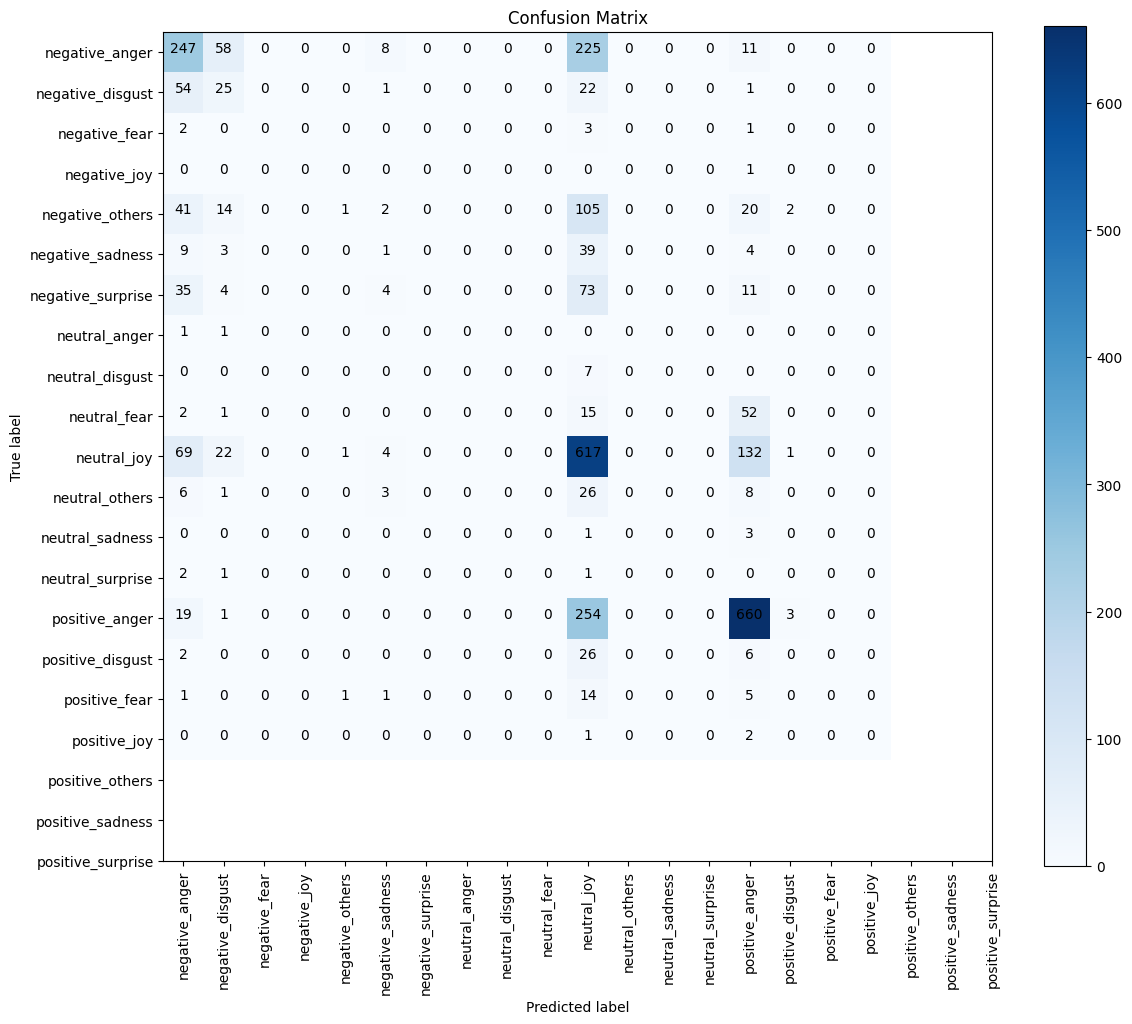

In [ ]:
# Plot confusion matrix with class names
plt.figure(figsize=(12, 10))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add class names
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=90)
plt.yticks(tick_marks, label_encoder.classes_)

# Add numerical values in each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


94/94 [==============================] - 4s 43ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


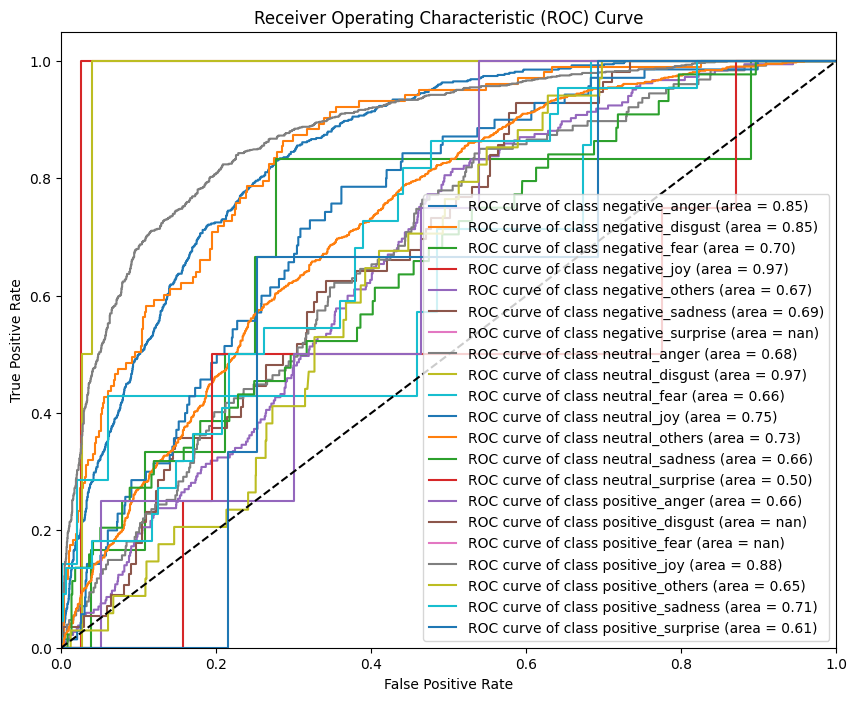

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_score = biLstm.predict(test_data)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(test_df['combined_label_encoded'] == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {} (area = {:.2f})'.format(label_encoder.inverse_transform([i])[0], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
